### > > > Example notebook < < <
# Connectome model building
This is the main script for model building, which
 - extracts connectome data
 - creates data-based models
 - visualizes data vs. model

> **IMPORTANT:** This notebook is a stand-alone extension to `connectome_manipulator.ipynb`

In [1]:
# Initialization

""" Global imports """
import os
import numpy as np

""" Local imports """
from connectome_manipulator.model_building import model_building

INFO: Circuit loaded: /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1/sonata/circuit_config.json
INFO: Loading data from ../working_dir/model_building/circuit-build-S1_v1/data/ConnProb3rdOrderFlatspace_TEST.pickle
INFO: Running order-3 model building...
INFO: Rel. error of complex 3rd-order model fit: [0.02212938 0.25280642 0.03022177 0.11972704 0.0837792  0.01745885
 0.0838875  0.01348672 0.10909085 0.04875884]
INFO: Model description:
ConnProb3rdOrderComplexExpModel
  p_conn(d, delta) = 0.097 * exp(-0.000311 * d^1.593) + 0.011 * exp(-0.002 * d) if delta < 0
                     0.076 * exp(-0.002771 * d^1.229) + 0.008 * exp(-0.003 * d) if delta > 0
                     AVERAGE OF BOTH MODELS  if delta == 0
  d...distance, delta...difference (tgt minus src) in 3rd coordinate
INFO: Model prediction of total number of connections: 108937 (model) vs. 109232 (data); DIFF -295 (-0.27%)
INFO: <TIME ELAPSED (model building): 0.1s>
INFO: Writing model to ../working_dir/

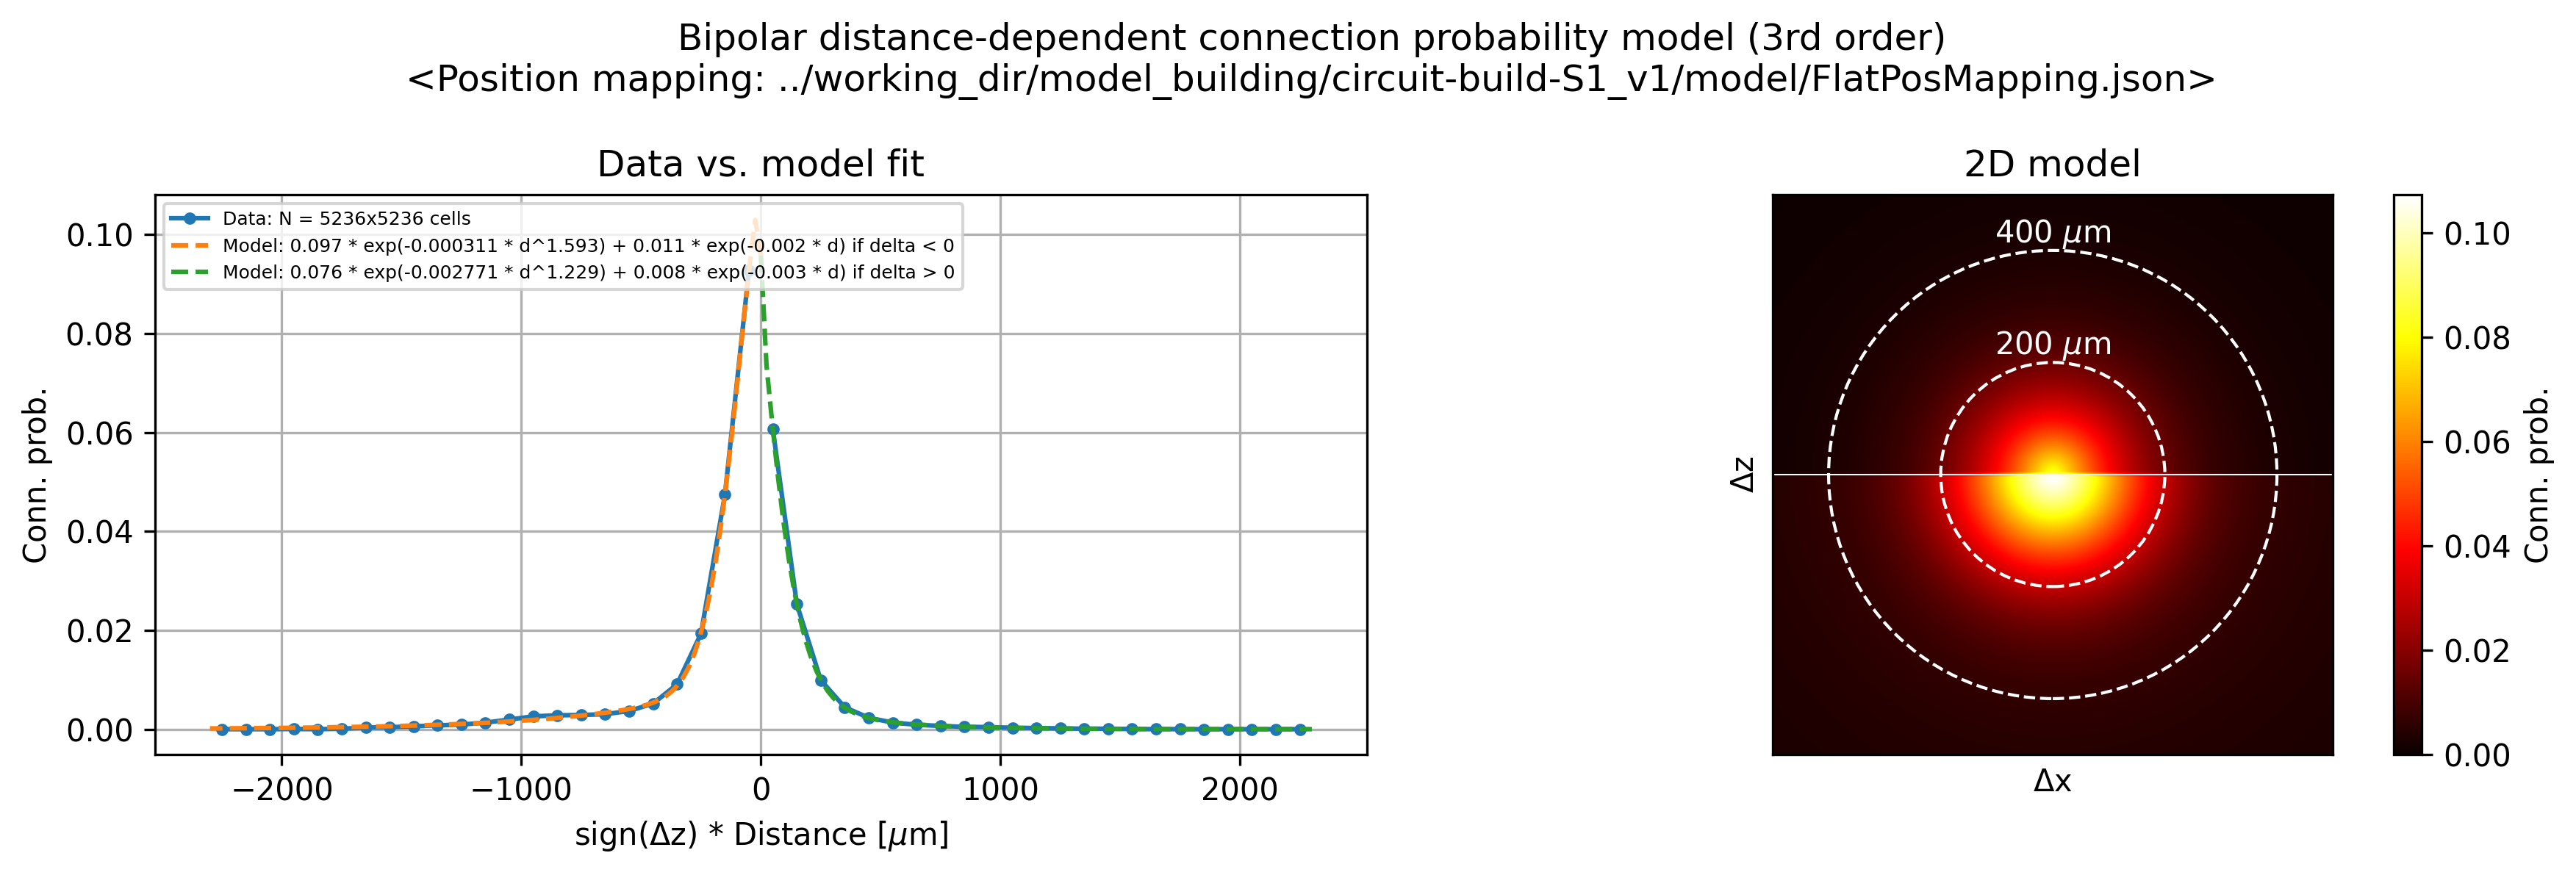

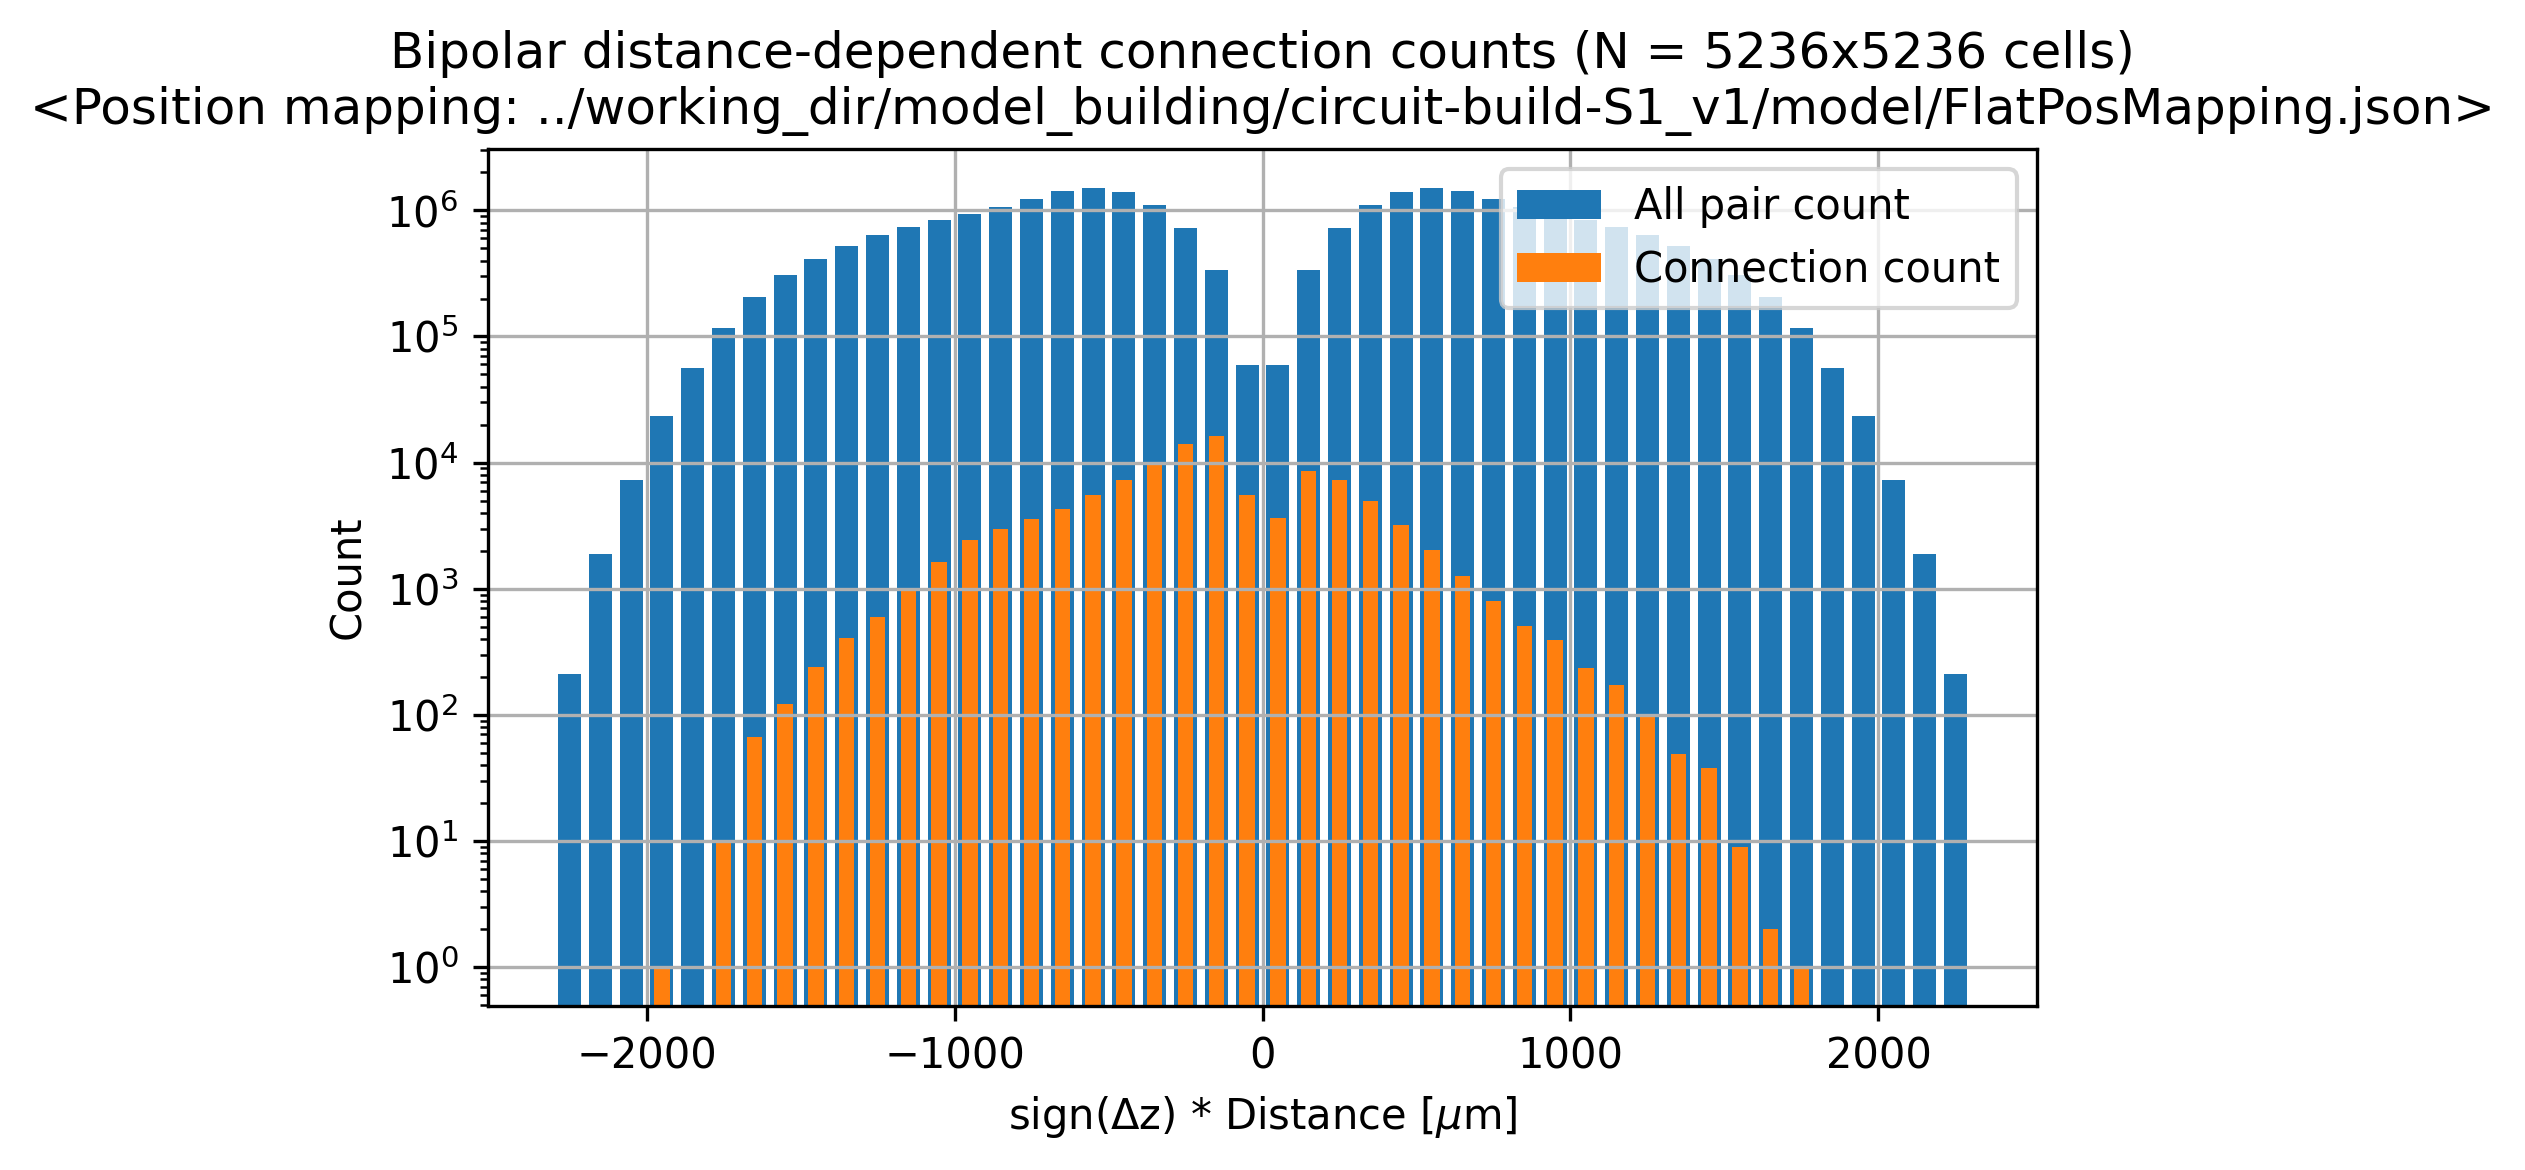

In [2]:
# Model building - Configuration

# circuit_path = '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/circuits/SSCx-Bio_M-20200805-HexO1'
# circuit_name = os.path.split(circuit_path)[-1]
# circuit_config = os.path.join(circuit_path, 'sonata', 'circuit_config.json')

# circuit_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SSCx-Bio_M-20200805'
# circuit_name = os.path.split(circuit_path)[-1]
# circuit_config = os.path.join(circuit_path, 'sonata', 'circuit_config.json')

circuit_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1'
circuit_name = os.path.split(circuit_path)[-1]
circuit_config = os.path.join(circuit_path, 'sonata', 'circuit_config.json')

# circuit_path = manip_config['circuit_path']
# circuit_name = f'{os.path.split(circuit_path)[-1]}__{manip_config["manip"]["name"]}'
# circuit_config = os.path.join(manip_config['circuit_path'], 'sonata', f'circuit_config_{manip_config["manip"]["name"]}.json')

# circuit_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA'
# circuit_name = os.path.split(circuit_path)[-1]
# circuit_config = os.path.join(circuit_path, 'sonata', 'circuit_config_OLD_.json')

model_config = {}

""" General settings """
model_config['working_dir'] = os.path.join('..', 'working_dir', 'model_building', circuit_name)
model_config['out_dir'] = os.path.join('figures', circuit_name)
# model_config['working_dir'] = os.path.join('/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/model_building', circuit_name)
# model_config['out_dir'] = os.path.join('/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/model_building/figures', circuit_name)
model_config['seed'] = 7531

""" Model specifications """
model_config['circuit_config'] = circuit_config
# model_config['model'] = {'name': 'DistDepDelay', 'fct': {'source': 'delay', 'kwargs': {'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'DistDepDelayEE', 'fct': {'source': 'delay', 'kwargs': {'sel_src': 'Excitatory', 'sel_dest': 'Excitatory', 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'DistDepDelayEI', 'fct': {'source': 'delay', 'kwargs': {'sel_src': 'Excitatory', 'sel_dest': 'Inhibitory', 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'DistDepDelayIE', 'fct': {'source': 'delay', 'kwargs': {'sel_src': 'Inhibitory', 'sel_dest': 'Excitatory', 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'DistDepDelayII', 'fct': {'source': 'delay', 'kwargs': {'sel_src': 'Inhibitory', 'sel_dest': 'Inhibitory', 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnPropsPerMType', 'fct': {'source': 'conn_props', 'kwargs': {'min_sample_size_per_group': 10, 'max_sample_size_per_group': 100}}}
# model_config['model'] = {'name': 'ConnProb1stOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sample_size': 1000}}}
# model_config['model'] = {'name': 'ConnProb1stOrderEE', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sel_src': 'Excitatory', 'sel_dest': 'Excitatory', 'sample_size': None}}}
# model_config['model'] = {'name': 'ConnProb2ndOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderEE', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sel_src': 'Excitatory', 'sel_dest': 'Excitatory', 'sample_size': None, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderEI', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sel_src': 'Excitatory', 'sel_dest': 'Inhibitory', 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderIE', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sel_src': 'Inhibitory', 'sel_dest': 'Excitatory', 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderII', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sel_src': 'Inhibitory', 'sel_dest': 'Inhibitory', 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb3rdOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 3, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb4thOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 4, 'sample_size': 2000, 'bin_size_um': 40, 'max_range_um': 500, 'model_specs': {'name': 'LinearInterpolation'}}}}
# model_config['model'] = {'name': 'ConnProb5thOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 5, 'sample_size': 2000, 'position_bin_size_um': 500, 'offset_bin_size_um': 100, 'offset_max_range_um': 500, 'model_specs': {'name': 'LinearInterpolation'}}}}
# model_config['model'] = {'name': 'FlatPosMapping', 'fct': {'source': 'pos_mapping', 'kwargs': {'flatmap_path': '/gpfs/bbp.cscs.ch/project/proj83/home/bolanos', 'xy_file': 'BB_Rat_SSCX_flatmap_v2', 'z_file': 'BB_Rat_SSCX_flatmap_v2_depths', 'xy_scale': None, 'z_scale': -1.0}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.pickle'}}}
# model_config['model'] = {'name': 'ConnProb3rdOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 3, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.pickle'}}}
# model_config['model'] = {'name': 'ConnProb4thOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 4, 'sample_size': 2000, 'bin_size_um': 40, 'max_range_um': 500, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.pickle'}}}
# model_config['model'] = {'name': 'ConnProb5thOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 5, 'sample_size': 2000, 'position_bin_size_um': [5000, 5000, 500], 'offset_bin_size_um': 50, 'offset_max_range_um': 500, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.pickle'}}}
# model_config['model'] = {'name': 'ConnProb5thOrderFlatspaceTest', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 5, 'sample_size': 2000, 'position_bin_size_um': 5000, 'offset_bin_size_um': 40, 'offset_max_range_um': 500, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.pickle'}}}

# model_config['model'] = {'name': 'SSFlatPosMappingHexO1', 'fct': {'source': 'pos_mapping_from_table', 'kwargs': {'nodes_spec': 'hex_O1', 'gid_column': 'gid', 'pos_file': '/gpfs/bbp.cscs.ch/project/proj102/scratch/SSCX_BioM/matrices/neuron_info.feather', 'coord_names': ['ss_flat_x', 'ss_flat_y', 'depth'], 'zero_based_indexing': False}}}
# model_config['model'] = {'name': 'XYZPosMappingHexO1', 'fct': {'source': 'pos_mapping_from_table', 'kwargs': {'nodes_spec': 'hex_O1', 'gid_column': 'gid', 'pos_file': '/gpfs/bbp.cscs.ch/project/proj102/scratch/SSCX_BioM/matrices/neuron_info.feather', 'coord_names': ['x', 'y', 'z'], 'zero_based_indexing': False}}}
# model_config['model'] = {'name': 'ErrXYZPosMappingHexO1', 'fct': {'source': 'pos_mapping_from_table', 'kwargs': {'nodes_spec': 'hex_O1', 'gid_column': 'gid', 'pos_file': '/gpfs/bbp.cscs.ch/project/proj102/scratch/SSCX_BioM/matrices/neuron_info.feather', 'coord_names': ['x', 'y', 'z'], 'zero_based_indexing': True}}}
# model_config['model'] = {'name': 'ConnProb2ndOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sel_src': 'Excitatory', 'sel_dest': 'Excitatory', 'sample_size': None, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'DistDepDelay', 'fct': {'source': 'delay', 'kwargs': {'sample_size': None, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'FlatPosMapping', 'fct': {'source': 'pos_mapping', 'kwargs': {'flatmap_path': '/gpfs/bbp.cscs.ch/project/proj83/home/bolanos', 'xy_file': 'BB_Rat_SSCX_flatmap_v2', 'z_file': 'BB_Rat_SSCX_flatmap_v2_depths', 'xy_scale': [34.0, 34.0], 'z_scale': -1.0}}}
# model_config['model'] = {'name': 'ConnPropsPerMType', 'fct': {'source': 'conn_props', 'kwargs': {'min_sample_size_per_group': 10, 'max_sample_size_per_group': 100}}}
# model_config['model'] = {'name': 'ConnProb1stOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sample_size': 2000}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderHexO1Exc', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sel_src': {'node_set': 'hex_O1', 'synapse_class': 'EXC'}, 'sel_dest': {'node_set': 'hex_O1', 'synapse_class': 'EXC'}, 'sample_size': 50000, 'bin_size_um': 100, 'max_range_um': 1000}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sample_size': 2000, 'bin_size_um': 100, 'max_range_um': None, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}
# model_config['model'] = {'name': 'ConnProb3rdOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 3, 'sample_size': 2000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb4thOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 4, 'sample_size': 2000, 'bin_size_um': 50, 'max_range_um': 500, 'smoothing_sigma_um': 50, 'model_specs': {'name': 'LinearInterpolation'}}}}
# model_config['model'] = {'name': 'ConnProb4thOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 4, 'sample_size': 2000, 'bin_size_um': 50, 'max_range_um': 500, 'smoothing_sigma_um': None, 'plot_model_ovsampl': 3, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}
# model_config['model'] = {'name': 'ConnProb4thOrderReduced', 'fct': {'source': 'conn_prob', 'kwargs': {'order': '4R', 'sample_size': 2000, 'bin_size_um': 50, 'max_range_um': [250, 500], 'smoothing_sigma_um': 50, 'model_specs': {'name': 'LinearInterpolation'}}}}
# model_config['model'] = {'name': 'ConnProb4thOrderReducedFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': '4R', 'sample_size': 2000, 'bin_size_um': 50, 'max_range_um': [400, [-1400, 600]], 'smoothing_sigma_um': None, 'plot_model_ovsampl': 7, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}
# model_config['model'] = {'name': 'ConnProb5thOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 5, 'sample_size': 2000, 'position_bin_size_um': [5000, 5000, 500], 'offset_bin_size_um': 100, 'offset_max_range_um': 500, 'smoothing_sigma_um': 100, 'model_specs': {'name': 'LinearInterpolation'}}}}
# model_config['model'] = {'name': 'ConnProb5thOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 5, 'sample_size': 2000, 'position_bin_size_um': [5000, 5000, 500], 'offset_bin_size_um': 100, 'offset_max_range_um': 500, 'smoothing_sigma_um': None, 'plot_model_ovsampl': 3, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}
# model_config['model'] = {'name': 'ConnProb5thOrderReducedFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': '5R', 'sample_size': 5000, 'position_bin_size_um': 400, 'position_max_range_um': [-2800, 400], 'offset_bin_size_um': 200, 'offset_max_range_um': [600, [-1600, 600]], 'smoothing_sigma_um': None, 'plot_model_ovsampl': 7, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}

# model_config['model'] = {'name': 'ConnProb4thOrderReducedFlatspaceL5TPCAL4TPC', 'fct': {'source': 'conn_prob', 'kwargs': {'order': '4R', 'sel_src': {'mtype': 'L5_TPC:A'}, 'sel_dest': {'mtype': 'L4_TPC'}, 'sample_size': None, 'bin_size_um': 20, 'max_range_um': [300, [-300, 600]], 'smoothing_sigma_um': None, 'plot_model_ovsampl': 7, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}
# model_config['model'] = {'name': 'ConnProb4thOrderReducedFlatspaceL5TPCAL4TPC', 'fct': {'source': 'conn_prob', 'kwargs': {'order': '4R', 'sel_src': {'node_set': 'hex_O1', 'mtype': 'L5_TPC:A'}, 'sel_dest': {'node_set': 'hex_O1', 'mtype': 'L4_TPC'}, 'sample_size': None, 'bin_size_um': 50, 'max_range_um': [400, [-500, 300]], 'smoothing_sigma_um': None, 'plot_model_ovsampl': 7, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/SSCx-Bio_M-20200805-HexO1/model/SSFlatPosMappingHexO1.json'}}}
# model_config['model'] = {'name': 'ConnProb4thOrderReducedFlatspaceL4TPCL5TPCA_tmp', 'fct': {'source': 'conn_prob', 'kwargs': {'order': '4R', 'sel_src': {'node_set': 'hex_O1', 'mtype': 'L4_TPC'}, 'sel_dest': {'node_set': 'hex_O1', 'mtype': 'L5_TPC:A'}, 'sample_size': 1000, 'min_count_per_bin': 100, 'bin_size_um': 50, 'max_range_um': [300, [-300, 300]], 'smoothing_sigma_um': None, 'plot_model_ovsampl': 7, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/SSCx-Bio_M-20200805-HexO1/model/SSFlatPosMappingHexO1.json'}}}

# model_config['model'] = {'name': 'DistDepDelay', 'fct': {'source': 'delay', 'kwargs': {'sample_size': None, 'bin_size_um': 100, 'max_range_um': None}}}

# model_config['model'] = {'name': 'NSynPerConnPerMType', 'fct': {'source': 'conn_props', 'kwargs': {'min_sample_size_per_group': 10, 'max_sample_size_per_group': 100, 'sel_props': []}}}
# model_config['model'] = {'name': 'ConnPropsPerMType', 'fct': {'source': 'conn_props', 'kwargs': {'min_sample_size_per_group': 10, 'max_sample_size_per_group': 100}}}
# model_config['model'] = {'name': 'ConnPropsPerMTypeL4L5', 'fct': {'source': 'conn_props', 'kwargs': {'sel_src': {'layer': 4}, 'sel_dest': {'layer': 5}, 'min_sample_size_per_group': 10, 'max_sample_size_per_group': 100}}}

# model_config['model'] = {'name': 'ConnProb1stOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sample_size': None}}}
# model_config['model'] = {'name': 'ConnProb1stOrderEE', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sel_src': {'node_set': 'Excitatory'}, 'sel_dest': {'node_set': 'Excitatory'}, 'sample_size': None}}}
# model_config['model'] = {'name': 'ConnProb1stOrderL3', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sel_src': {'node_set': 'Layer3'}, 'sel_dest': {'node_set': 'Layer3'}, 'sample_size': None}}}
# model_config['model'] = {'name': 'ConnProb2ndOrderFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sel_src': {'node_set': 'hex_O1', 'mtype': 'L1_DAC'}, 'sel_dest': {'node_set': 'hex_O1', 'mtype': 'L23_BP'}, 'sample_size': 10000, 'min_count_per_bin': 100, 'bin_size_um': 50, 'max_range_um': 1000, 'pos_map_file': '../working_dir/model_building/SSCx-Bio_M-20200805-HexO1/model/SSFlatPosMappingHexO1.json'}}}
# model_config['model'] = {'name': 'ConnProb4thOrderReducedFlatspace', 'fct': {'source': 'conn_prob', 'kwargs': {'order': '4R', 'sel_src': {'node_set': 'hex_O1'}, 'sel_dest': {'node_set': 'hex_O1'}, 'sample_size': 2000, 'min_count_per_bin': 100, 'bin_size_um': 50, 'max_range_um': [400, [-400, 1000]], 'smoothing_sigma_um': None, 'plot_model_ovsampl': 7, 'plot_model_extsn': 0, 'model_specs': {'name': 'LinearInterpolation'}, 'pos_map_file': '../working_dir/model_building/SSCx-Bio_M-20200805-HexO1/model/SSFlatPosMappingHexO1.json'}}}
# model_config_pathways = model_building.create_model_config_per_pathway(model_config, 'mtype')

# model_config['model'] = {'name': 'ConnProb2ndOrderFlatspace_TEST', 'fct': {'source': 'conn_prob', 'kwargs': {'rel_fit_err_th': None, 'strict_fit': True, 'order': 2, 'sel_src': {'node_set': 'hex_O1', 'mtype': 'L23_NGC'}, 'sel_dest': {'node_set': 'hex_O1', 'mtype': 'L23_NGC'}, 'sample_size': 1000, 'min_count_per_bin': 100, 'bin_size_um': 50, 'max_range_um': 1000, 'pos_map_file': '../working_dir/model_building/SSCx-Bio_M-20200805-HexO1/model/SSFlatPosMappingHexO1.json'}}}
# model_config['model'] = {'name': 'ConnProb3rdOrderFlatspace_TEST', 'fct': {'source': 'conn_prob', 'kwargs': {'rel_fit_err_th': None, 'strict_fit': True, 'order': 3, 'sel_src': {'node_set': 'hex_O1', 'mtype': 'L23_NGC'}, 'sel_dest': {'node_set': 'hex_O1', 'mtype': 'L23_NGC'}, 'sample_size': 1000, 'min_count_per_bin': 100, 'bin_size_um': 50, 'max_range_um': 1000, 'pos_map_file': '../working_dir/model_building/SSCx-Bio_M-20200805-HexO1/model/SSFlatPosMappingHexO1.json'}}}
# group_fct = lambda x: str.split(x, '_')[-1] # None #lambda x: str.split(x, '_')[-1]
# model_config_pathways = model_building.create_model_config_per_pathway(model_config, 'mtype', group_fct=group_fct)
# model_config_pathways = model_building.create_model_config_per_pathway(model_config, ['layer', 'synapse_class'])

# model_config['model'] = {'name': 'ConnProb2ndOrderFlatspace_TEST', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'model_specs': {'type': 'ComplexExponential'}, 'sel_src': 'Excitatory', 'sel_dest': 'Excitatory', 'sample_size': 10000, 'bin_size_um': 100, 'max_range_um': None, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}
model_config['model'] = {'name': 'ConnProb3rdOrderFlatspace_TEST', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 3, 'model_specs': {'type': 'ComplexExponential', 'p0': [0.0, 0.0, 1.0, 0.0, 0.0], 'bounds': [[0.0, 0.0, 1.0, 0.0, 0.0], [np.inf, np.inf, 1.9, np.inf, np.inf]]}, 'sel_src': 'Excitatory', 'sel_dest': 'Excitatory', 'sample_size': 10000, 'bin_size_um': 100, 'max_range_um': None, 'pos_map_file': '../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.json'}}}

# Model building - Run
model_building.main(model_config, show_fig=True, force_recomp=[False, True])
# model_building.main(model_config_pathways, show_fig=False, force_recomp=[False, False])